# jitcsim tutorial

### Simulation of the Kuramoto model 
- (Type I, look at the documentation).
The parameter of the model is coupling.
The initial phase also could be changed in repeated simulations.
The output is plotting the Kuramoto order parameter vs time.

For Type I oscillators on Feed Forward (Feed Back) loop, we expect to get high 
(low) values of the order parameters [1].

[1] Ziaeemehr, A., Zarei, M. and Sheshbolouki, A., 2020. Emergence of global synchronization in directed excitatory networks of type I neurons. Scientific reports, 10(1), pp.1-11.


In [7]:
import numpy as np
from numpy import pi
from random import randint
from numpy.random import uniform, normal
from jitcsim.visualization import plot_order
from jitcsim.models.kuramoto import Kuramoto_I

In [8]:
np.random.seed(2)

N = 3
alpha0 = 0.0
coupling0 = 2.0 / (N - 1)
omega0 = normal(pi, 0.1, N)
initial_state = uniform(-2*pi, 2*pi, N)

FeedForward = np.asarray([[0, 0, 0],
                          [1, 0, 0],
                          [1, 1, 0]])
FeedBack = np.asarray([[0, 0, 1],
                       [1, 0, 0],
                       [0, 1, 0]])

parameters = {
    'N': N,                             # number of nodes
    'adj': FeedForward,                 # adjacency matrix
    # "adj": FeedBack,
    't_initial': 0.,                    # initial time of integration
    "t_final": 100,                     # final time of integration
    't_transition': 0.0,                # transition time
    "interval": 0.1,                    # time interval for sampling

    "alpha": alpha0,                    # frustration
    "omega": omega0,                    # initial angular frequencies
    'initial_state': initial_state,     # initial phase of oscillators

    'integration_method': 'dopri5',     # integration method
    'control': ['coupling'],            # control parameters

    "use_omp": False,                   # use OpenMP
    "output": "data",                   # output directory
}

In [9]:
parameters["modulename"] = "km{}".format(randint(0, 1e6)) # to avoid modulename error
# make an instance of the model
sol = Kuramoto_I(parameters)
# compile the model
sol.compile()

saving file to data/km704363.so


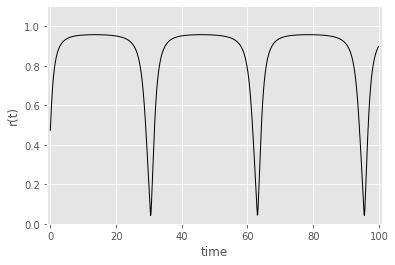

In [10]:
# run the simulation by setting the control parameters
controls = [coupling0]
data = sol.simulate(controls)
x = data['x']
t = data['t']

# calculate the Kuramoto order parameter
order = sol.order_parameter(x)

# plot order parameter vs time
plot_order(t,
           order,
           filename="data/06.png",
           xlabel="time", 
           ylabel="r(t)", 
           close_fig=False);

To use another network, we need to compile the code again, adjacency matrix is not among the variables that could be considered as parameter.

In [11]:
parameters["modulename"] = "km{}".format(randint(0, 1e6)) # to avoid modulename error
parameters['adj'] = FeedBack
sol = Kuramoto_I(parameters)
sol.compile()

saving file to data/km743844.so


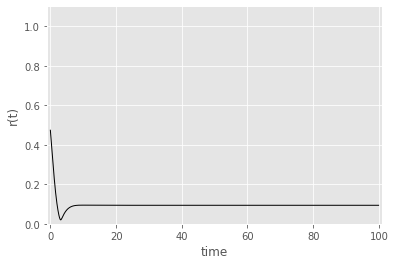

In [12]:
controls = [coupling0]
data = sol.simulate(controls)
x = data['x']
t = data['t']

# calculate the Kuramoto order parameter
order = sol.order_parameter(x)

# plot order parameter vs time
plot_order(t,
           order,
           filename="data/fb.png",
           xlabel="time", 
           ylabel="r(t)", 
           close_fig=False);